# Assignment 2
### Understanding Uncertainty
### Due 9/12

### Helen Corbat

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

- I'm going to define profit as percentage (Retail/Cost-1)*100%. This allows us to compare profit between items might have very different costs.

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('iowa.csv')
df["total_cost"] = df["State Bottle Cost"] *df["Bottles Sold"]
item_df = df.groupby("Item Description").agg({"total_cost":"sum","Sale (Dollars)":"sum"})
item_df["percent_profit"] = (item_df["Sale (Dollars)"]/item_df["total_cost"]-1)*100
item_df["total_profit"]=item_df["Sale (Dollars)"] - item_df["total_cost"]
item_df.sort_values("percent_profit",ascending= False).head()



,total_cost,Sale (Dollars),percent_profit,total_profit
Item Description,,,,
BLONDIES LEMONADE,15.00,135.00,800.000000,120.00
OLD PULTENEY 12YR,22.50,202.50,800.000000,180.00
JAGERMEISTER COLD BREW COFFEE LIQUEUR MINI,145.53,487.30,234.845049,341.77
BAILEYS W/2 DESSERT BOWLS,37.50,112.50,200.000000,75.00
WESTERN SON ORIGINAL VODKA,117.13,324.48,177.025527,207.35


In [6]:
item_df.sort_values("total_profit",ascending= False).head()

,total_cost,Sale (Dollars),percent_profit,total_profit
Item Description,,,,
TITOS HANDMADE VODKA,727950.18,1089534.02,49.671509,361583.84
BLACK VELVET,543040.88,817065.33,50.461109,274024.45
FIREBALL CINNAMON WHISKEY,374954.38,562508.92,50.020629,187554.54
CROWN ROYAL,321723.07,482125.60,49.857329,160402.53
CROWN ROYAL REGAL APPLE,245643.06,368257.76,49.915801,122614.70


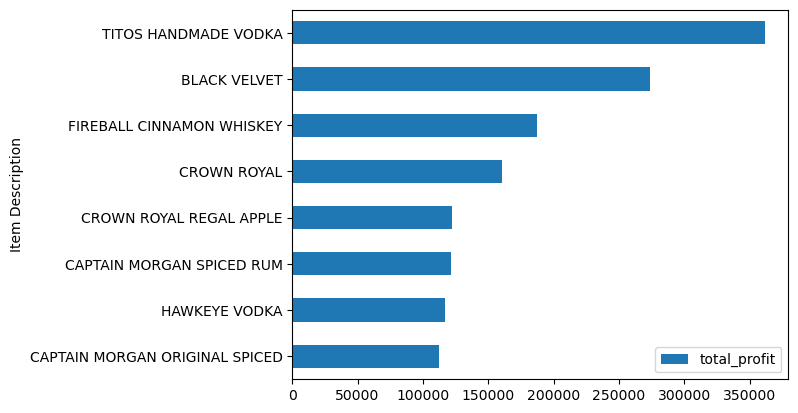

In [5]:
import matplotlib.pyplot as plt
top_liquors = item_df.sort_values("total_profit",ascending= True).tail(8)
top_liquors.plot.barh(y = "total_profit")
plt.show()


2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(-1,1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(1,-1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [33]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [34]:
print(x-y)

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

I received a ValueError because the shapes between x & y did not match.

In [37]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

now, I'm getting a 3 X 2 array.

In [39]:
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

This one I got a 2 X 3 array, which happens to be the transpose of the previous one.

In [ ]:
result = np.zeros(shape = (3,2))
for i in range(len(x)):
    for j in range(len(y)):
        result[i][j] = x[i]-y[j]
print(result)

[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]


In [49]:
result = np.zeros(shape = (2,3))
for i in range(len(y)):
    for j in range(len(x)):
        result[i][j] = x[j]-y[i]
print(result)

[[-1.  1.  3.]
 [-4. -2.  0.]]


the reshape(-1,1) sets the size of the last axis to 1, in other words, it takes 1 dimensional array and turns into 2 dimensional array with one column. 
the reshape (1,-1) takes the one dimenional arry and turns into two dimensional array with one row and as many columns as needed.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ is false and 1 if $x \le z$ is true.

- For $y = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition that
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

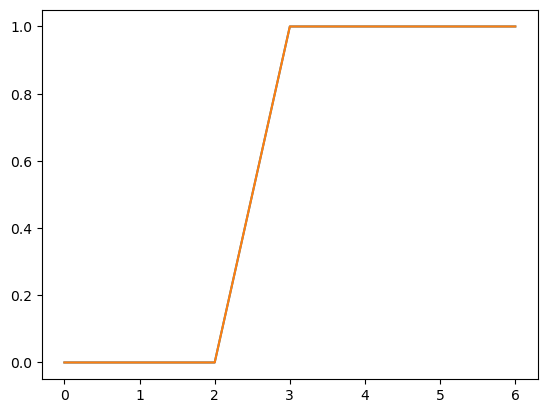

In [53]:
x = 3
z = np.array([0,1,2,3,4,5,6])
ind = np.where(x <= z,1,0)
plt.plot(ind)
plt.show()

if I{x <= z} = 0, then I{x > z} will equal 1 because in all cases 1 and only in these conditions will be true.

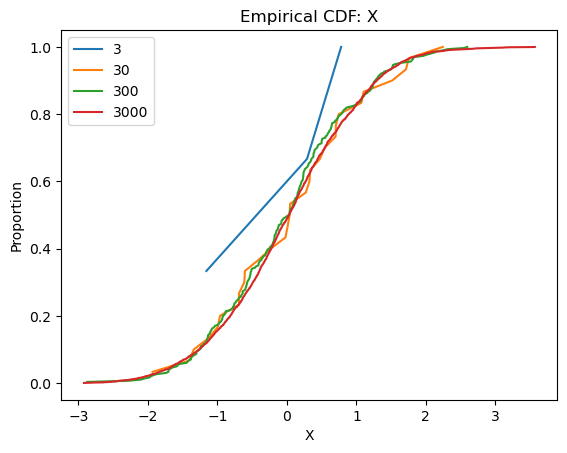

In [9]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

def ecdf(x, plot = True, N = None):
    # Compute ecdf function:
    Z = np.sort(x.unique()) # Extract and sort unique values for x
    compare = x.to_numpy().reshape(-1,1) <= Z.reshape(1,-1) # Compare x and Z values
    
    ecdf = np.mean(compare,axis=0) # Average over x indices for each z
    
    if plot:
        # Plot the ecdf:
        title_str = "X"
        plt.plot(Z,ecdf,label = str(N) )
        plt.title(f'Empirical CDF: {title_str}')
        plt.ylabel('Proportion')
        plt.xlabel(title_str)
        plt.legend()
    return ecdf, Z

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    X = pd.Series(X)
    F_hat,grid = ecdf(X,N = N)


From the ECDF plot above,the ECDF plot gets much smoothier as the sample size increases.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [22]:
def my_quantile(X,q):
    F_hat,Z = ecdf(X,N = len(X),plot= False)
    idex = np.argmin(F_hat < q)
    return Z[idex]
print(my_quantile(X,1))

3.56712031045318


In [ ]:
def IQR(X):
    return(my_quantile(X,0.75)-my_quantile(X,0.25))


In [29]:
def five_number(X):
    first = my_quantile(X,0)
    second =my_quantile(X,0.25)
    third = my_quantile(X,0.5)
    fourth = my_quantile(X,0.75)
    Fifth = my_quantile(X,1)
    whisker1 = second -(1.5 * IQR(X))
    whisker2 = fourth + (1.5*IQR(X))
    return(whisker1,whisker2,first,second,third,fourth,Fifth)

In [30]:
def outlier(X):
    whisker1,whisker2,_,_,_,_,_ = five_number(X)
    return((X < whisker1)| (X > whisker2))

In [31]:
X = df["Sale (Dollars)"]
print(five_number(X))

(-138.01999999999995, 327.41999999999996, -1628.4, 36.52, 78.66, 152.88, 36720.0)


In [32]:
X.describe()

count    159904.000000
mean        146.931598
std         459.368723
min       -1628.400000
25%          36.550000
50%          78.660000
75%         152.880000
max       36720.000000
Name: Sale (Dollars), dtype: float64

<Axes: ylabel='Sale (Dollars)'>

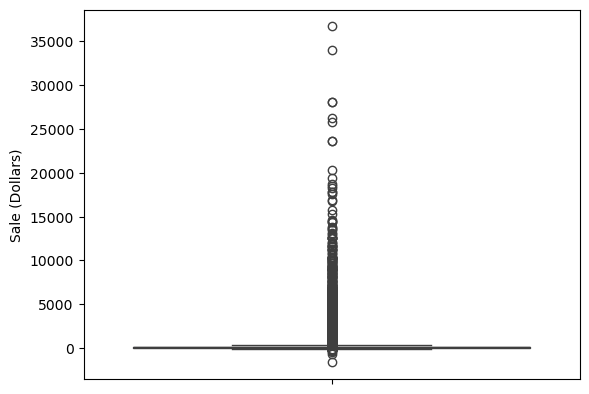

In [33]:
import seaborn as sns
sns.boxplot(X)

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?